In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#For this assignment, I chose to look at different RNA expression values to see how training a model based on them would help us predict the type of tumor within a patient. This data was found at https://archive.ics.uci.edu/ml/datasets/gene%2Bexpression%2Bcancer%2BRNA-Seq. data.csv is a file with patients in the rows and genes in the columns. Each patient has their own RNA expression levels for each gene present in the data table. labels.csv is a table of all the tumor types that each patient has. Thus, in the ML model, X will be the RNA gene expression data and y will be the label data. This code will use a Random Forest Classifier because it is best used for classification problems such as this one. 

In [5]:
data = pd.read_csv("data.csv")
labels = pd.read_csv("labels.csv")

data_df = pd.DataFrame(data)
labels_df = pd.DataFrame(labels)

data_df = data_df.drop(columns = ["Unnamed: 0"])
labels_df = labels_df.drop(columns = ["Unnamed: 0"])

In [94]:
print(data_df)

     gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0       0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1       0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2       0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3       0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4       0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   
..      ...       ...       ...       ...        ...     ...       ...   
796     0.0  1.865642  2.718197  7.350099  10.006003     0.0  6.764792   
797     0.0  3.942955  4.453807  6.346597  10.056868     0.0  7.320331   
798     0.0  3.249582  3.707492  8.185901   9.504082     0.0  7.536589   
799     0.0  2.590339  2.787976  7.318624   9.987136     0.0  9.213464   
800     0.0  2.325242  3.805932  6.530246   9.560367     0.0  7.957027   

       gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
0    0.591871     0.0     0.0  ...   

In [95]:
print(labels_df)

    Class
0    PRAD
1    LUAD
2    PRAD
3    PRAD
4    BRCA
..    ...
796  BRCA
797  LUAD
798  COAD
799  PRAD
800  PRAD

[801 rows x 1 columns]


In [96]:
data_df.shape #seeing the shape of our dataframes to make sure that the number of samples (first number) matches in both

(801, 20531)

In [97]:
# The data_df dataframe has 20,531 genes. This is a lot of features to train by.
# So, let's choose a more reasonable number of genes, like 10 (arbitrary number chosen). Because all of these genes
# are unknown, it may be interesting to see how the model works if the genes are chosen at random.
# So, we can implement the following code:

data_df = data_df.sample(n=10, axis='columns')
data_df.shape

(801, 10)

In [98]:
labels_df.shape

(801, 1)

In [99]:
#Now we have to convert all the labels from categorical to numerical

labels_df["Class"].replace(['BRCA', 'KIRC', 'COAD', 'LUAD', 'PRAD'], [1, 2, 3, 4, 5], inplace = True)
print(labels_df)

     Class
0        5
1        4
2        5
3        5
4        1
..     ...
796      1
797      4
798      3
799      5
800      5

[801 rows x 1 columns]


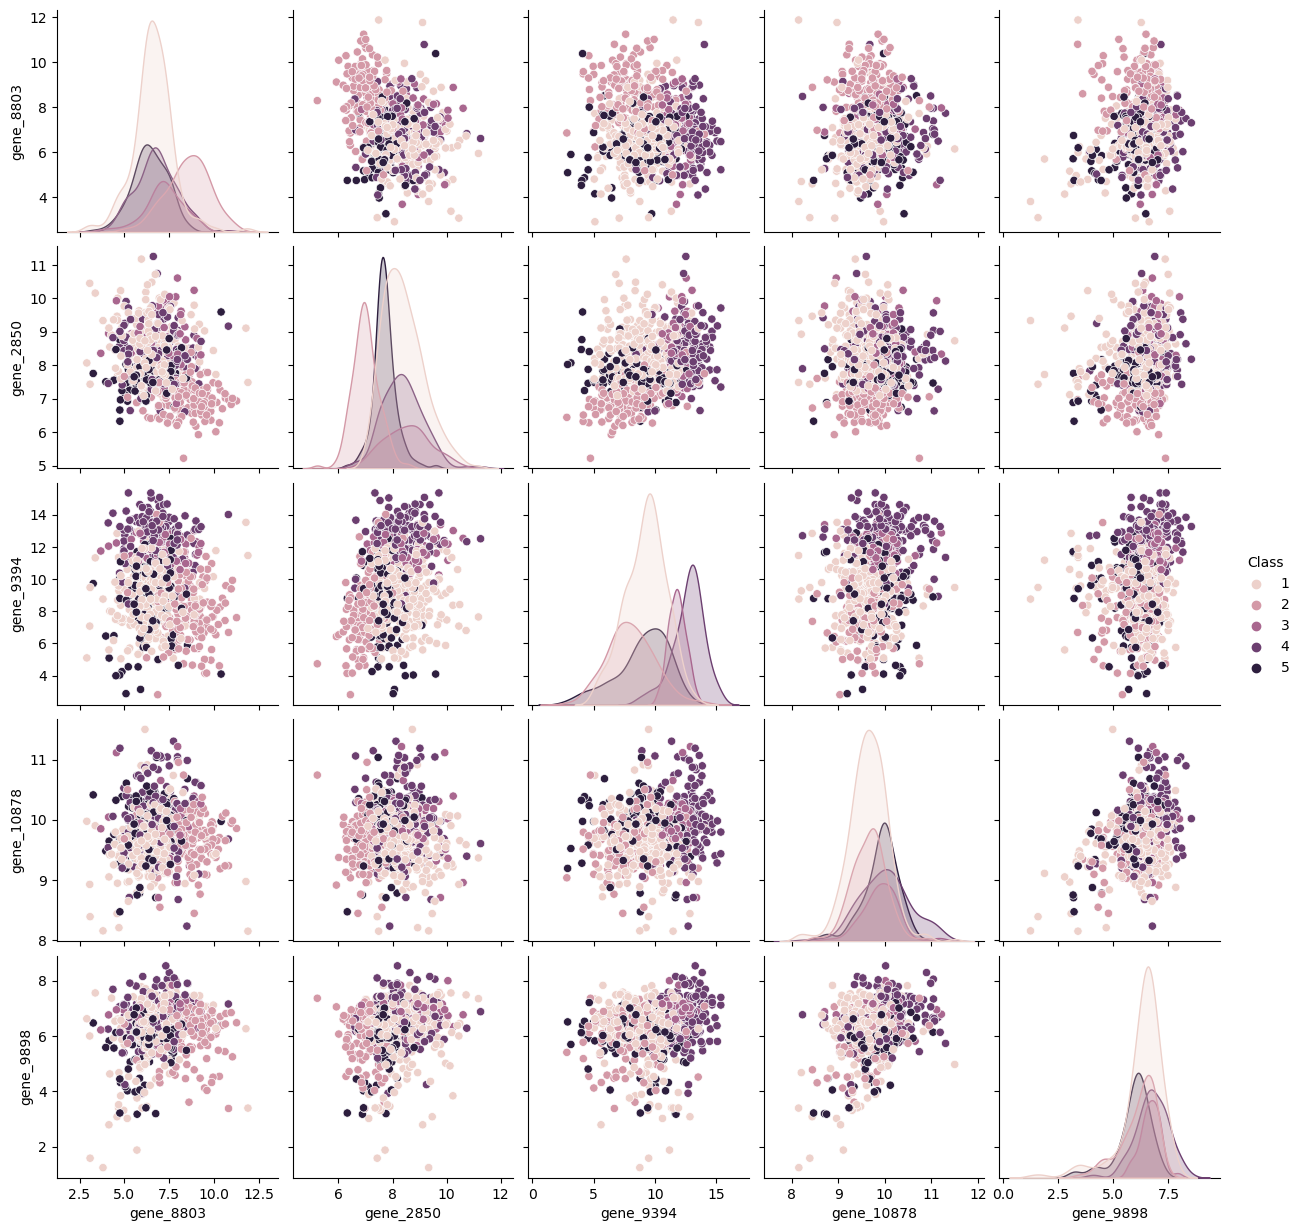

In [100]:
#Combining data and labels to use in a pair plot to examine data just for the first five genes

combined_df = pd.concat([data_df, labels_df], axis=1, join='inner')
column_names = list(combined_df.columns)
sns.pairplot(combined_df, hue = "Class", vars = (column_names[0:5]))
plt.show()

In [101]:
#finding how many instances of each tumor type are in the labels

combined_df['Class'].value_counts()

#from here, we see that we have 300 BRCA, 146 KIRC, 141 LUAD, 136 PRAD, and 78 COAD instances

1    300
2    146
4    141
5    136
3     78
Name: Class, dtype: int64

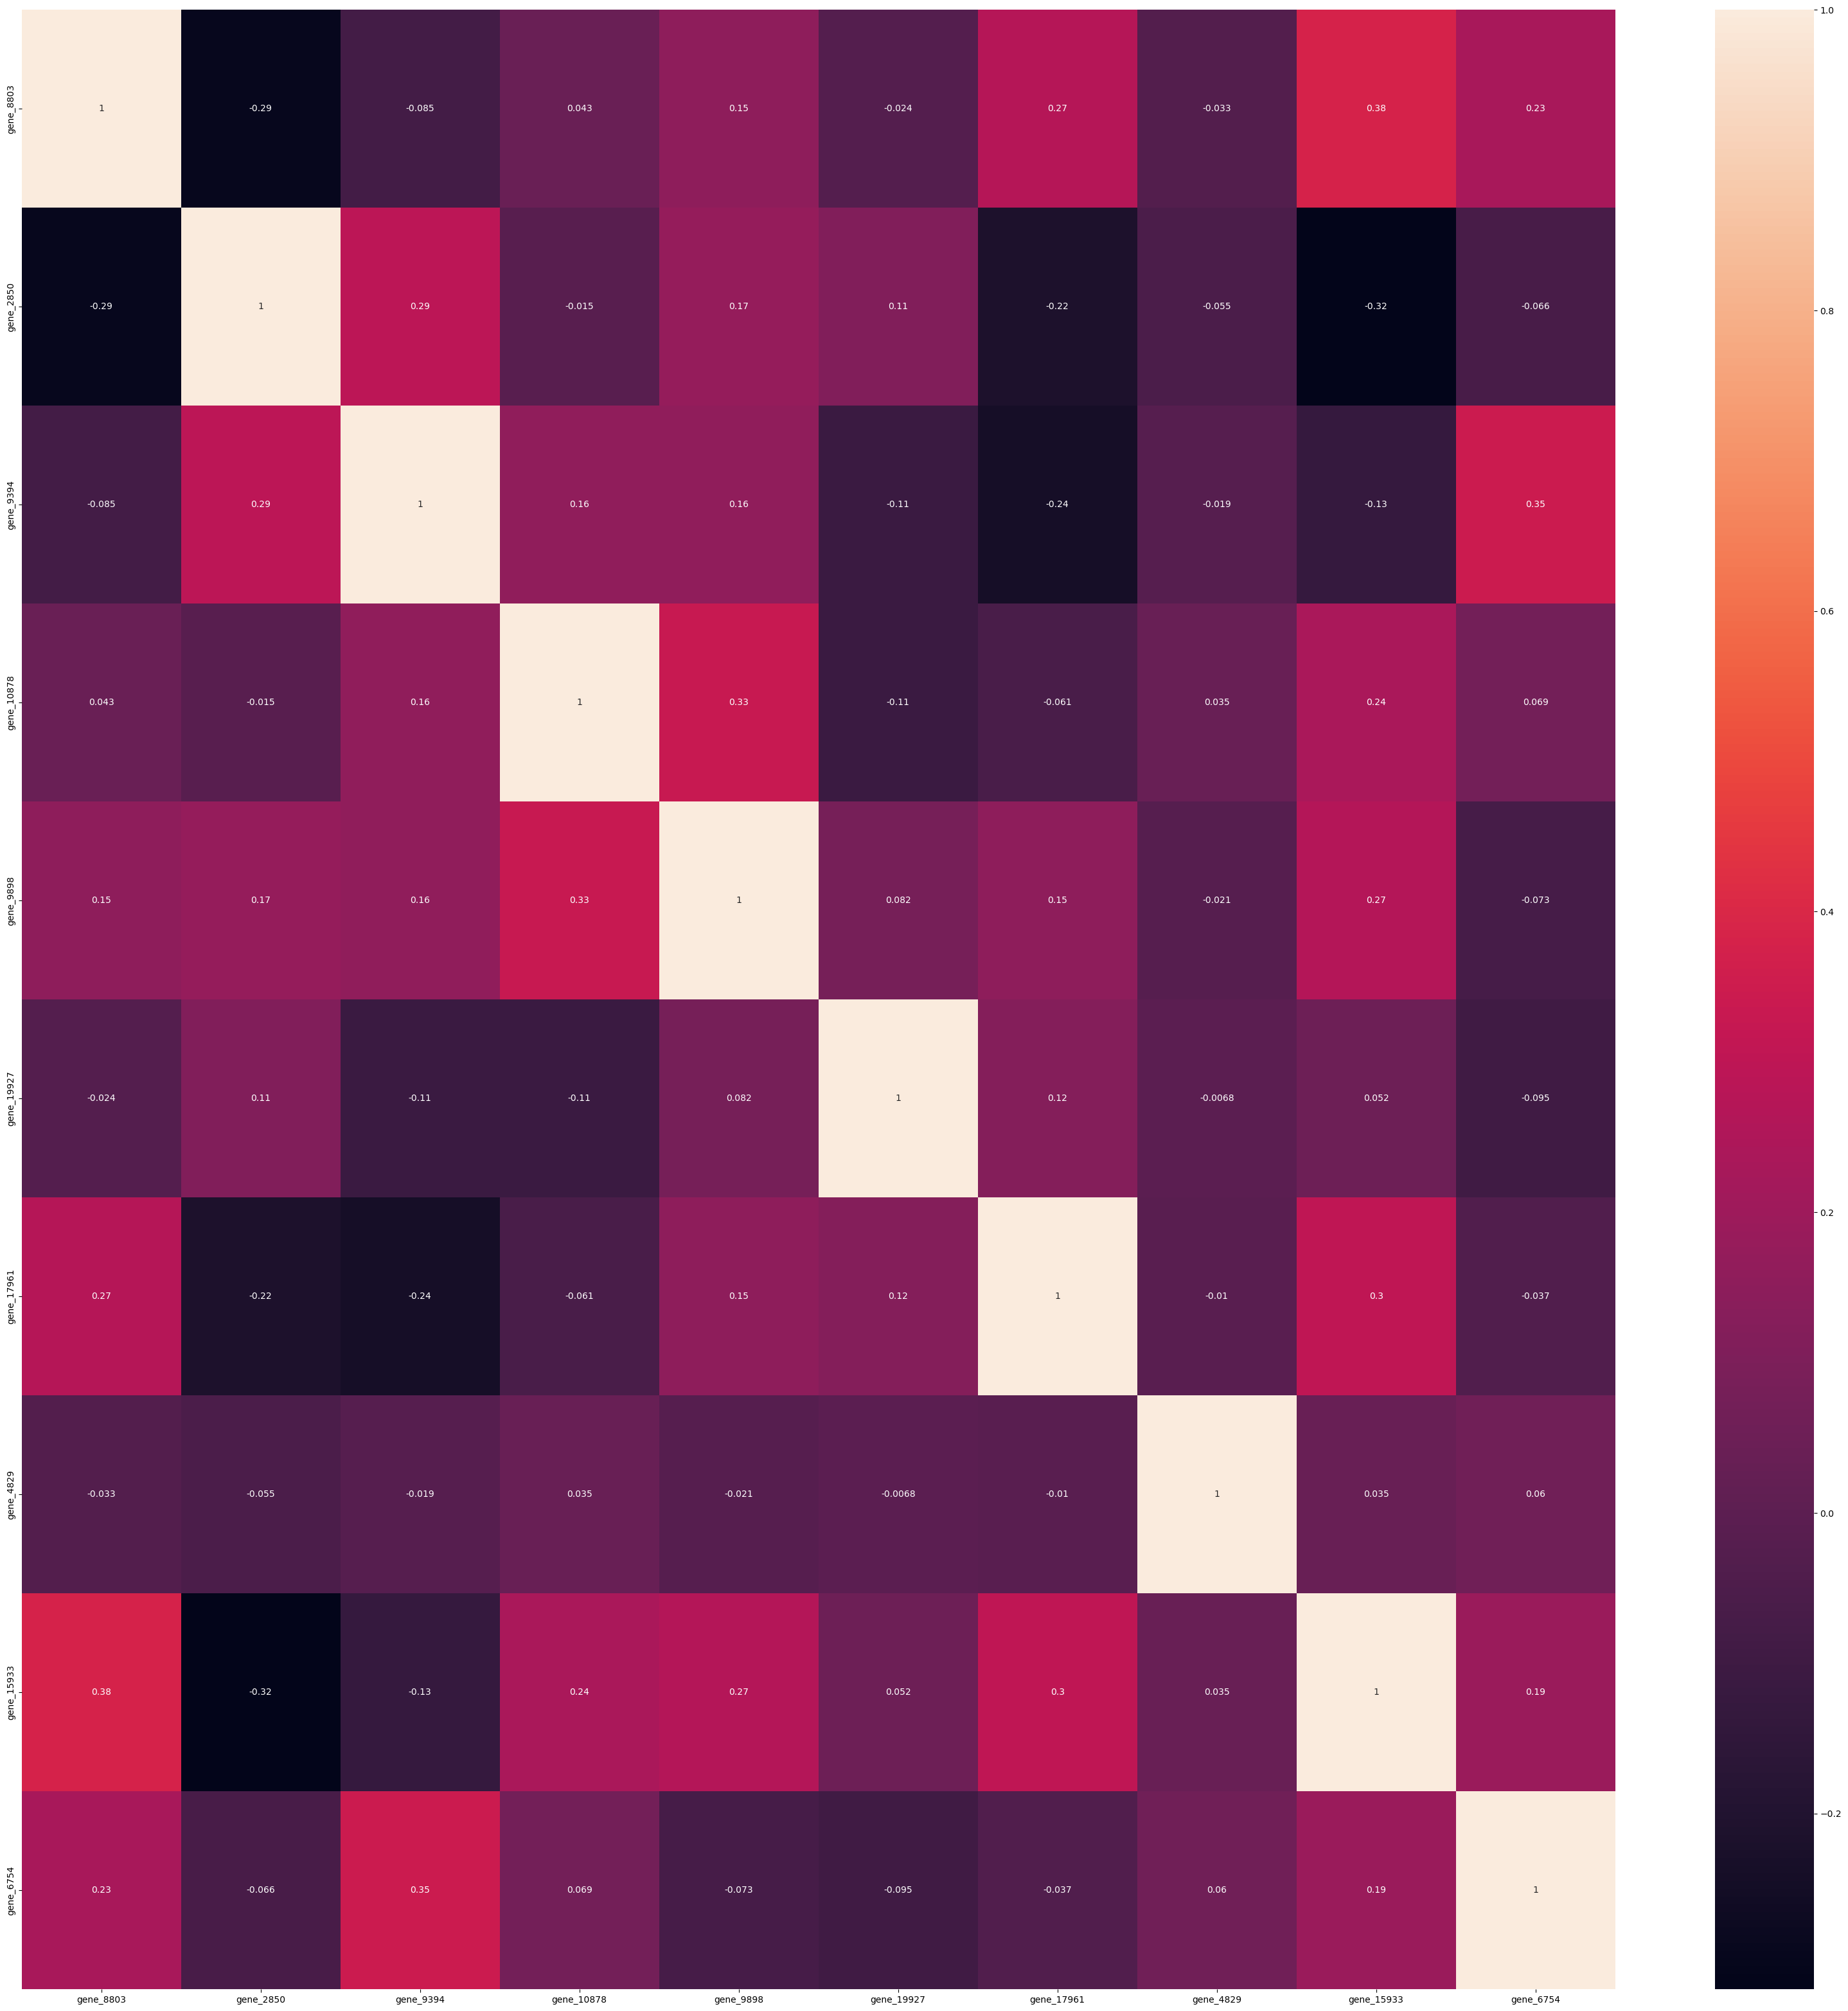

In [102]:
#Now let's check the correlation of the genes to complete Feature Reduction

plt.figure(figsize=(40,40)) 
sns.heatmap(data_df.corr(), annot=True)
plt.show()

In [103]:
# As can be seen by the heatmap, there is no need for feature reduction with this cleaned dataset
# as the genes do not correlate with one another that much. We can now train the ML model on this data

X_train, X_test, y_train, y_test = train_test_split(data_df, labels_df, test_size = 0.2, random_state = 20)
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (640, 10)


The size of our testing "X" (input features) is (161, 10)


The size of our training "y" (output feature) is (640, 1)


The size of our testing "y" (output features) is (161, 1)


In [104]:
#introducing the classifier and fitting the ML model to the training data
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/2146352827.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [105]:
#using the trained model to predict the values given the test data
y_predict = classifier.predict(X_test)

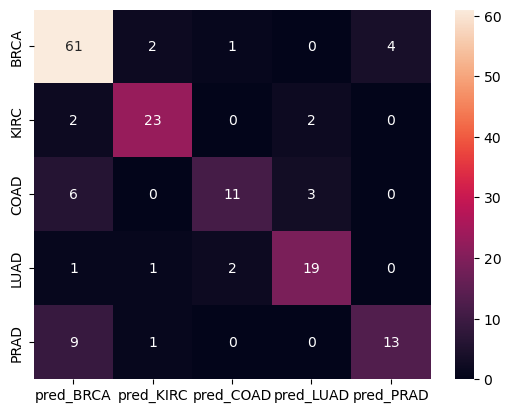

In [106]:
#setting up a visual to understand how many matches and mismatches there are between the real data and predicted data
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,2,3,4,5]))
confusion = pd.DataFrame(cm, index=['BRCA', 'KIRC', 'COAD', 'LUAD', 'PRAD'],
                         columns=['pred_BRCA', 'pred_KIRC', 'pred_COAD', 'pred_LUAD', 'pred_PRAD'])
sns.heatmap(confusion, annot=True)
plt.show()

In [107]:
print(classification_report(y_test, y_predict)) #these stats are not terrible but let's see if we can do better
# There are two ways we can do this with this data. The first is by potentially improving our model by normalizing our data
# and the second is by increasing the number of genes that we use to train the data. 

              precision    recall  f1-score   support

           1       0.77      0.90      0.83        68
           2       0.85      0.85      0.85        27
           3       0.79      0.55      0.65        20
           4       0.79      0.83      0.81        23
           5       0.76      0.57      0.65        23

    accuracy                           0.79       161
   macro avg       0.79      0.74      0.76       161
weighted avg       0.79      0.79      0.78       161



In [112]:
#normalizing training data

X_train_min = X_train.min()
X_train_max = X_train.max()
X_train_range = (X_train_max - X_train_min)
X_train_scaled = (X_train - X_train_min)/(X_train_range)
print(X_train_scaled.head())

     gene_8803  gene_2850  gene_9394  gene_10878  gene_9898  gene_19927  \
211   0.423437   0.656435   0.458140    0.463808   0.783873    0.195302   
708   0.469936   0.481567   0.609731    0.349199   0.759078    0.110130   
225   0.544171   0.462359   0.494809    0.482953   0.790569    0.094362   
191   0.739835   0.260766   0.685172    0.453420   0.798680    0.000000   
57    0.460419   0.647779   0.711904    0.429402   0.795385    0.094243   

     gene_17961  gene_4829  gene_15933  gene_6754  
211    0.454850        0.0    0.484048   0.233592  
708    0.479278        0.0    0.513701   0.629173  
225    0.480363        0.0    0.656618   0.604435  
191    0.602618        0.0    0.600246   0.732475  
57     0.354689        0.0    0.403592   0.596182  
(640, 10)


In [109]:
#normalizing testing data

X_test_min = X_test.min()
X_test_max = X_test.max()
X_test_range = (X_test_max - X_test_min)
X_test_scaled = (X_test - X_test_min)/X_test_range
print(X_test_scaled.head())

     gene_8803  gene_2850  gene_9394  gene_10878  gene_9898  gene_19927  \
507   0.183232   0.879717   1.000000    0.519278   0.874427    0.000000   
327   0.814372   0.275064   0.208080    0.532112   0.552825    0.000000   
647   0.604977   0.185269   0.434592    0.715250   0.691257    0.215448   
738   0.625158   0.508412   0.735127    0.701442   0.746648    0.000000   
172   0.462398   0.658249   0.262070    0.656363   0.552696    0.303693   

     gene_17961  gene_4829  gene_15933  gene_6754  
507    0.305640        0.0    0.027677   0.788548  
327    0.442585        0.0    0.719350   0.547335  
647    0.354742        0.0    0.656915   0.559842  
738    0.500595        0.0    0.708403   0.559404  
172    0.711316        0.0    0.670659   0.299384  


In [113]:
#refitting the classifier with normalized data

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_scaled, y_train)

/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1531128739.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [114]:
#re-predicting with the normalized test data

y_predict_scaled = classifier.predict(X_test_scaled)

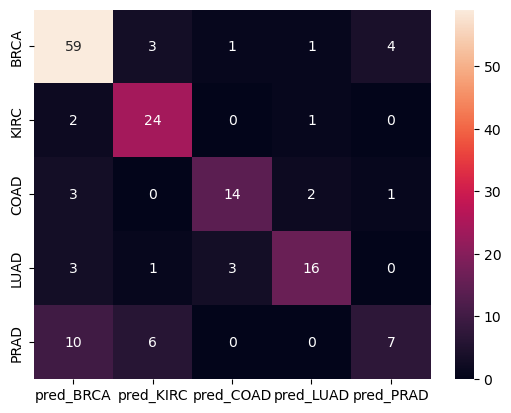

In [115]:
#using a heatmap to show the matches and mismatches with the normalized data

cm = np.array(confusion_matrix(y_test, y_predict_scaled, labels=[1,2,3,4,5]))
confusion = pd.DataFrame(cm, index=['BRCA', 'KIRC', 'COAD', 'LUAD', 'PRAD'],
                         columns=['pred_BRCA', 'pred_KIRC', 'pred_COAD', 'pred_LUAD', 'pred_PRAD'])
sns.heatmap(confusion, annot=True)
plt.show()

In [116]:
print(classification_report(y_test,y_predict))
# Well that didn't exactly go according to plan. I normalized the data and our accuracy and precision all decreased.
# Then, instead of normalizing the data, what if I looked at increasing the number of factors in use by 
#using all the data that was accessible to me?

              precision    recall  f1-score   support

           1       0.77      0.87      0.81        68
           2       0.71      0.89      0.79        27
           3       0.78      0.70      0.74        20
           4       0.80      0.70      0.74        23
           5       0.58      0.30      0.40        23

    accuracy                           0.75       161
   macro avg       0.73      0.69      0.70       161
weighted avg       0.74      0.75      0.73       161



In [156]:
# To do that, I will increase the amount of genes included to a larger amount and see if the classifer is able to run
# with a higher accuracy and/or precision:

data_df = pd.DataFrame(data)
data_df = data_df.drop(columns = ["Unnamed: 0"])

data_df = data_df.sample(n=500, axis='columns')
data_df.shape

(801, 500)

In [157]:
#this means retraining our data on the now 500 genes that we're using instead of 10.

X_train, X_test, y_train, y_test = train_test_split(data_df, labels_df, test_size = 0.2, random_state = 20)
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (640, 500)


The size of our testing "X" (input features) is (161, 500)


The size of our training "y" (output feature) is (640, 1)


The size of our testing "y" (output features) is (161, 1)


In [158]:
#then we retrain the ML model on the 500 gene data points we have for each patient.

classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/2634136648.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

In [159]:
#we then use the new ML model to predict the classifications of the test data.
y_predict = classifier.predict(X_test)

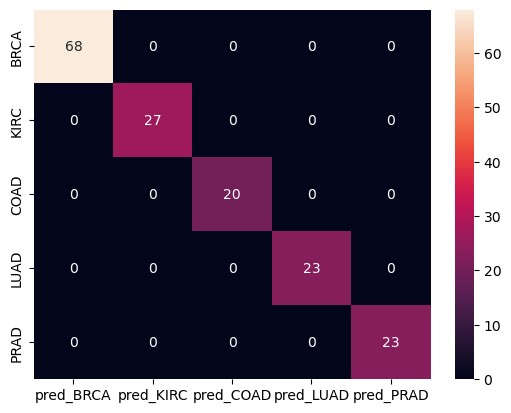

In [161]:
#also, we use a heatmap to visualize how many matches and mismatches we have

cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,2,3,4,5]))
confusion = pd.DataFrame(cm, index=['BRCA', 'KIRC', 'COAD', 'LUAD', 'PRAD'],
                         columns=['pred_BRCA', 'pred_KIRC', 'pred_COAD', 'pred_LUAD', 'pred_PRAD'])
sns.heatmap(confusion, annot=True)
plt.show()

#seems like we don't have very many mismatches!

In [160]:
print(classification_report(y_test,y_predict))

#using more factors to train our model on shows us that, in this case, it is helping us differentiate between
#the different tumor types

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        23

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



In [182]:
# Thus, based on the sheer amount of data available, it seems like Random Forest Classifier is a good
# model to use to predict the type of tumor in a patient based on the RNA expression values of 500 randomly
# selected genes. Another astonishing fact is that the sampling data is random which means when the sampling
# code was run over and over again, I got similar accuracy and precision as what is indicated above. I ran the
# previous lines of code above a total of 50 times (see for loop below) and saw that 50/50 times, the accuracy 
# was reported to be above 95%.
counter = 0
for x in range(50):
    data_df = pd.DataFrame(data)
    data_df = data_df.drop(columns = ["Unnamed: 0"])
    data_df = data_df.sample(n=500, axis='columns')
    
    X_train, X_test, y_train, y_test = train_test_split(data_df, labels_df, test_size = 0.2, random_state = 20)

    classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    
    y_predict = classifier.predict(X_test)
    
    rep = classification_report(y_test,y_predict).split("\n")
    for num in rep[8].split(" "):
        if "." in num and num > "0.95":
            counter = counter + 1
    print(counter)
print(counter)

/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


1


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


2


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


3


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


4


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


5


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


6


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


7


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


8


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


9


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


10


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


11


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


12


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


13


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


14


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


15


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


16


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


17


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


18


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


19


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


20


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


21


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


22


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


23


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


24


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


25


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


26


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


27


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


28


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


29


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


30


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


31


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


32


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


33


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


34


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


35


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


36


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


37


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


38


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


39


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


40


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


41


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


42


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


43


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


44


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


45


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


46


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


47


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


48


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


49


/var/folders/z2/z4rmk79963l_trmcdlb01zsw0000gn/T/ipykernel_74795/1717679701.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


50
50
